In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

NPY_DIR = r"C:\Users\jingyli\OwnDrive\IPA\attribution_Result\unet\attribution_pickle\resUnet"

# Anomalies


### Calculate Daily MSE curve & SE curve for anomaly grid

In [64]:
date = "2019-09-19"
anomaly_grid = (184,346)
times = np.arange(0,273,3)
# Overall MSE
speed_mse = []
vol_mse = []
# Relative Error for anomaly cell
c_speed_err = []
c_vol_err = []
# Predictions
speed = []
vol = []


def get_result(err, pred, coords):
    gt = pred[coords] + err[coords]
    relative_err = np.absolute(err[coords] / gt)
    mse = np.sqrt(np.mean(np.power(err / (pred+err), 2)))
    
    return gt, relative_err, mse


for time in times:
    result_path = f"{date}_berlin_9ch{time}-err-pred.npy"
    result = np.load(os.path.join(NPY_DIR, f"{date}_{time}", result_path))
    # Volume
    gt, re, mse = get_result(result[2], result[0], anomaly_grid)
    vol_mse.append(mse)
    c_vol_err.append(re)
    vol.append(gt)
    # Speed
    gt, re, mse = get_result(result[3], result[1], anomaly_grid)
    speed_mse.append(mse)
    c_speed_err.append(re)
    speed.append(gt)

<ipython-input-64-34d4b0bf77ee>:17: RuntimeWarning: divide by zero encountered in double_scalars
  relative_err = np.absolute(err[coords] / gt)
<ipython-input-64-34d4b0bf77ee>:18: RuntimeWarning: divide by zero encountered in true_divide
  mse = np.sqrt(np.mean(np.power(err / (pred+err), 2)))
<ipython-input-64-34d4b0bf77ee>:18: RuntimeWarning: invalid value encountered in true_divide
  mse = np.sqrt(np.mean(np.power(err / (pred+err), 2)))


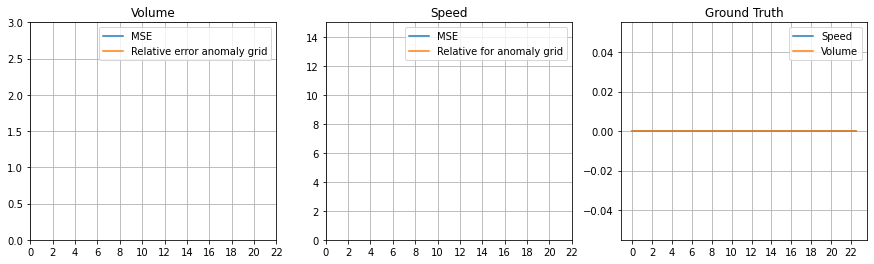

In [65]:
# Visualize 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
xticks = np.arange(0,times.shape[0],8)
xticklabels = xticks//4
# Volume
axes[0].set_title("Volume")
ax = axes[0]
ax.plot(vol_mse, label="MSE")
ax.plot(c_vol_err, label="Relative error anomaly grid")
ax.set_ylim(0,3)

# Speed
axes[1].set_title("Speed")
ax = axes[1]
ax.plot(speed_mse, label="MSE")
ax.plot(c_speed_err, label="Relative for anomaly grid")
ax.set_ylim(0,15)
# Prediction
axes[2].set_title("Ground Truth")
ax = axes[2]
ax.plot(speed, label="Speed")
ax.plot(vol, label="Volume")

for ax in axes:
    ax.legend()
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.grid("on")

plt.show()